In [8]:
!pip install matplotlib seaborn pandas numpy

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 9.3 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 8.3 MB/s eta 0:00:01
   ----------------------- ---------------- 4.7/8.1 MB 7.2 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 7.4 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.3 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.3 MB 9.8 MB/s eta 0:00:01
   ------------------------------------- -- 2.1/2.3 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.7 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---- ----------------------------------- 0.8/7.0 MB 9.3 MB/s eta 0:00:01
   ------------- ----------------------

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from ISLP import load_data

In [ ]:
auto = load_data("auto")
auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto = auto.dropna()

In [ ]:
median_mpg = auto['mpg'].median()
auto['mpg01'] = np.where(auto['mpg'] > median_mpg, 1, 0)

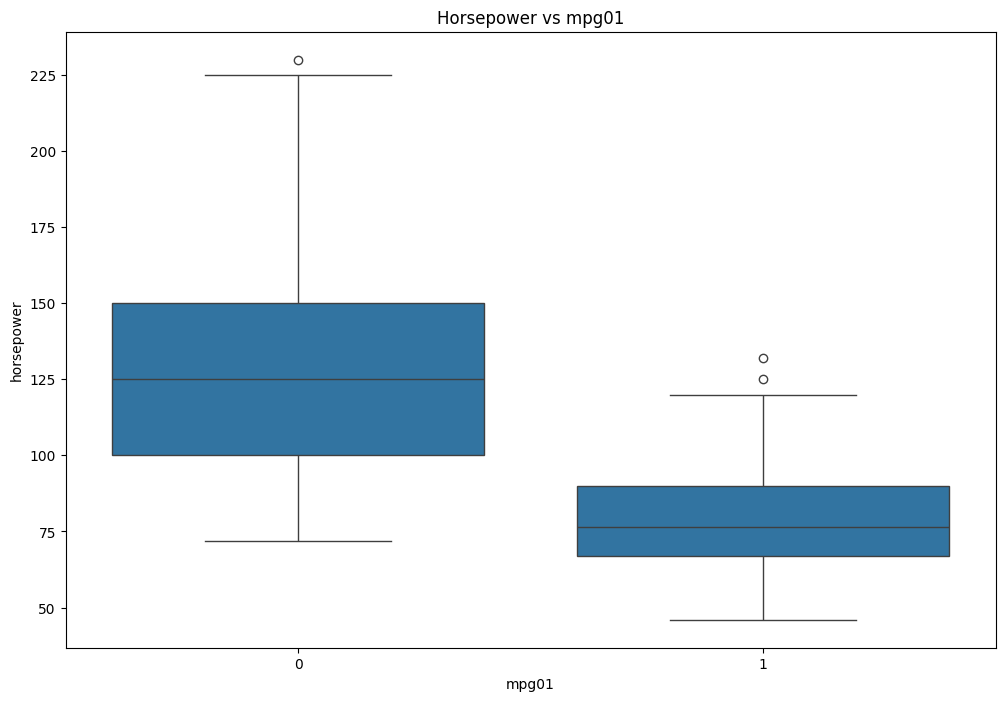

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mpg01', y='horsepower', data=auto)
plt.title("Horsepower vs mpg01")
plt.show()

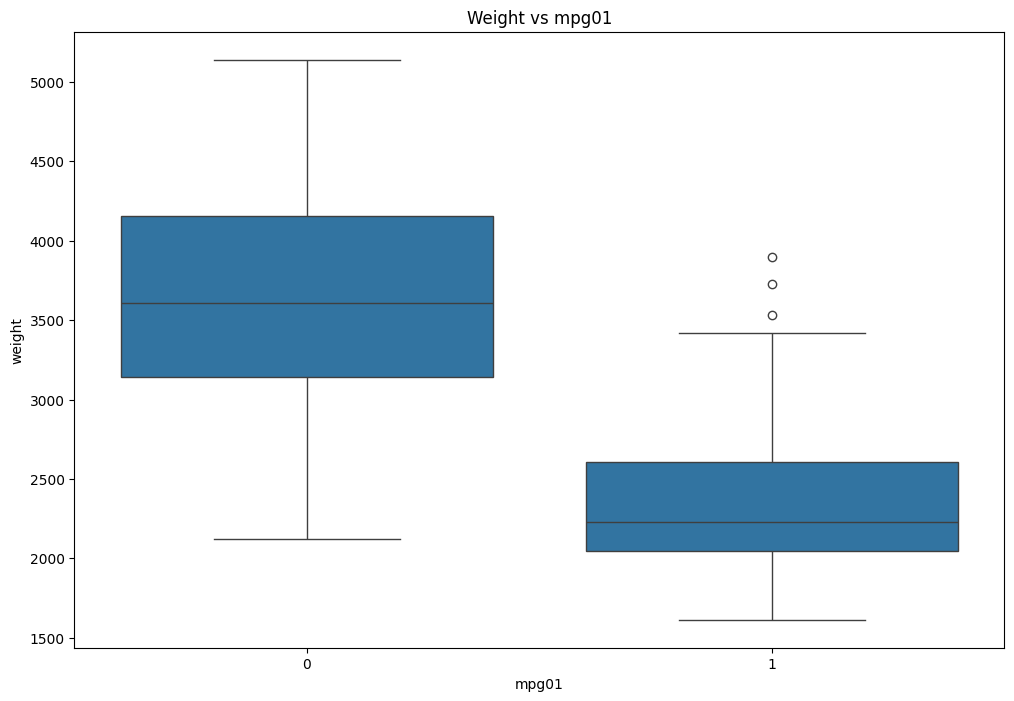

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mpg01', y='weight', data=auto)
plt.title("Weight vs mpg01")
plt.show()

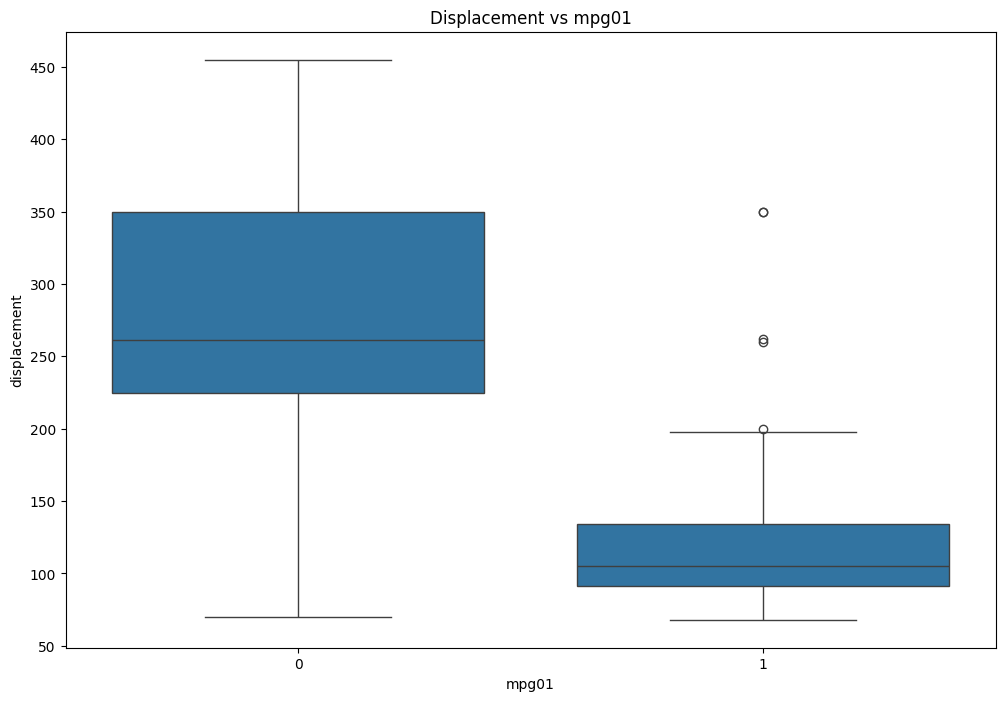

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mpg01', y='displacement', data=auto)
plt.title("Displacement vs mpg01")
plt.show()

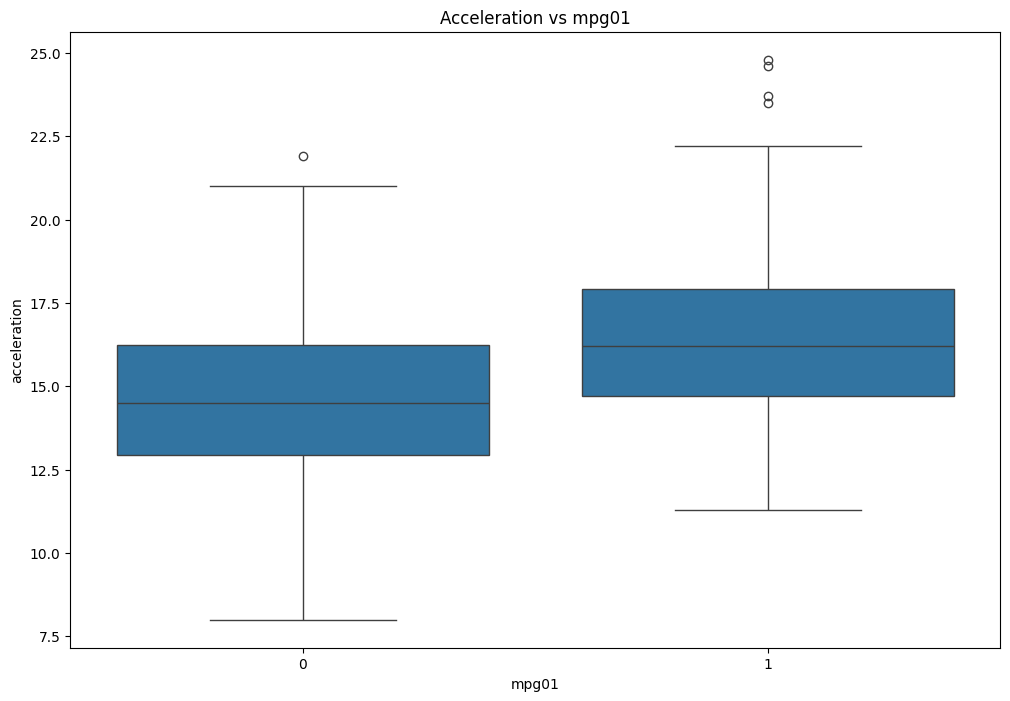

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='mpg01', y='acceleration', data=auto)
plt.title("Acceleration vs mpg01")
plt.show()

In [ ]:
#Train test split
X = auto[['horsepower', 'weight', 'displacement', 'acceleration']]
y = auto['mpg01']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_pred = lda.predict(X_test)

lda_error = 1 - accuracy_score(y_test, lda_pred)
print("LDA Test Error:", lda_error)

LDA Test Error: 0.1610169491525424


In [ ]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda_pred = qda.predict(X_test)

qda_error = 1 - accuracy_score(y_test, qda_pred)
print("QDA Test Error:", qda_error)

QDA Test Error: 0.1694915254237288


In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_pred = log_reg.predict(X_test)

log_error = 1 - accuracy_score(y_test, log_pred)
print("Logistic Regression Test Error:", log_error)


Logistic Regression Test Error: 0.15254237288135597


In [ ]:
for k in [1, 3, 5, 7, 9, 11, 15, 20]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, knn_pred)
    print(f"K={k} --> Test Error: {knn_error:.3f}")

K=1 --> Test Error: 0.153
K=3 --> Test Error: 0.136
K=5 --> Test Error: 0.161
K=7 --> Test Error: 0.169
K=9 --> Test Error: 0.169
K=11 --> Test Error: 0.178
K=15 --> Test Error: 0.178
K=20 --> Test Error: 0.178
